In [16]:
################################################
##
## plotting subwords
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt



#######################################################

np.set_printoptions(suppress=True)


#######################################################

In [17]:
ML_raw_data = pd.read_csv('ML_metrics_results.csv', index_col=False) 



ML_raw_data.reset_index(drop=True, inplace=True)

In [18]:
the_book = 'The_Great_Gatsby'


result_pd = ML_raw_data[(ML_raw_data.lang == 'English') & (ML_raw_data.book == the_book)] 

result_pd = result_pd[['recall', 'subword','idsubword']]

print(result_pd)

recalls    = result_pd['recall']
idsubwords = result_pd['idsubword']

print(len(recalls))



        recall           subword  idsubword
0     0.726509               NaN        -15
1     0.846194               son         -7
2     0.670341               lið      39045
3     0.732808               573     198938
4     0.538058              ение      17377
5     0.717585              deur      77991
6     0.637270             lings      33992
7     0.750656             ประสบ     168906
8     0.823097             ฤทธิ์     151352
9     0.718635               622     160033
10    0.751181                 ፱     237561
11    0.535958           scrição     125953
12    0.696588               дка      63369
13    0.593701                 层      26595
14    0.666667            វីដេអូ     165988
15    0.691339                 早       7629
16    0.459843        fogyasztás     129662
17    0.691339                らし     145071
18    0.653543           кладено     216071
19    0.710761                да        677
20    0.694488                 👥     247744
21    0.808924              を読んで

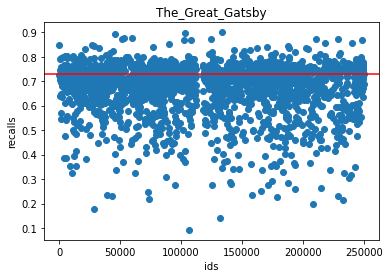

In [19]:

fig = plt.figure()

plt.xlabel("ids")
plt.ylabel("recalls")

plt.scatter(idsubwords, recalls) 
plt.title(the_book)
plt.axhline(y=0.73 , color='r', linestyle='-')
plt.savefig('300dpiGatsby2020.png', dpi=300)
plt.show()

## Sorting

In [20]:
df = result_pd 
df
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values('recall', ascending=False)
df_sorted


,recall,subword,idsubword
283,0.899738,ထြန္း,134021
1433,0.898163,owicz,103396
592,0.893963,说道,45994
1075,0.874541,රත්න,60093
1328,0.874541,俊,53390
1966,0.874016,夫妇,210449
536,0.871916,ұлы,51217
1653,0.871391,ప్రసాద్,124841
1660,0.870341,鄧,229053
747,0.869291,骞,248225


In [22]:
recalls_count    = df_sorted[  df['recall'] > 0.78 ]
print(len(recalls_count))

120


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_33474/2306004891.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recalls_count    = df_sorted[  df['recall'] > 0.78 ]


In [23]:
print(recalls_count)

        recall    subword  idsubword
283   0.899738      ထြန္း     134021
1433  0.898163      owicz     103396
592   0.893963         说道      45994
1075  0.874541       රත්න      60093
1328  0.874541          俊      53390
1966  0.874016         夫妇     210449
536   0.871916        ұлы      51217
1653  0.871391    ప్రసాద్     124841
1660  0.870341          鄧     229053
747   0.869291          骞     248225
288   0.868241       शंकर     102625
116   0.867192   owskiego     108207
1369  0.856168  Элбэгдорж     240572
561   0.854593        李克强     217862
321   0.852493         兒子      90249
899   0.847244         加上      27043
1     0.846194        son         -7
380   0.845144       దీప్     187836
442   0.842520        iņš      28815
689   0.841470       සේකර     170901
1239  0.838845         擔任      77154
1183  0.835696        වංශ     188374
1779  0.835171         彼得     162651
711   0.834646         的話      32463
1839  0.834646          彬     202573
1228  0.833071        絕對是     204174
1